# Feedforward Neural Networks

## Contents
1. Introduction  
    1.1. The sigmoid unit  
    1.2. The Rectified Linear Unit (ReLU)  
2. Multi-layer neural networks  
    2.1. Learning a XOR function  
    2.2. Visual interpretation  
    2.3. Generalization and vectorized notation  
3. Backpropagation algorithm

# Introduction
A **feedforward neural network**, also called **multilayer perceptron** (MLP), is a type of **artificial neural network** (ANN) wherein connections between nodes do not form a cycle (differently from its descendant: the *recurrent neural networks*). Its goal is to approximate some function $f^*$ by defining a mapping $y=f(x;w)$ and learning the value of the parameters $w$ that result in the best approximation. It is called feedforward because information flows from the input layer $x$, through the intermediate layers, to the output $y$, without any *feedback* connections where the outputs are fed back into the network. Before talking about networks, we have to introduce the units that will make up the network.

### The sigmoid unit
Let's first introduce a "building block" for our neural network: the **sigmoid unit**. It is simply an artificial neuron in which the activation function is a sigmoid function (which has already been introduced in the chapter on Logistic Regression).

<img src="images/neural_networks/sigmoid_unit.jpg" style="width:60%"/>

Differently from the perceptron, which doesn't distinguish between points that lie close to the boundary and points that lie far, the sigmoid neuron outputs a value between 0 and 1. So, if we think of a classification model composed by only one sigmoid unit, we can consider the output value as the probability of the input point to be classified as positive.

The sigmoid function is monotonic and continuously differentiable, so we can use gradient descent methods to "train" a single sigmoid unit and an algorithm called **backpropagation** to train a network of units.

The cost function is, again:

$$J(w)=\frac{1}{2}\sum_{i}{\left(y^{(i)}-\phi\left(z^{(i)}\right)\right)^2}$$

$\phi(z)$ is the sigmoid function and its derivative is $\frac{\partial}{\partial z}{\phi(z)} = \phi(z)\left(1-\phi(z)\right)$.

The derivative of $J$ is then:

$$\begin{align}
    \frac{\partial J}{\partial w_j} &= \frac{\partial}{\partial w_j} \frac{1}{2}\sum_{i}{\left(y^{(i)}-\phi\left(z^{(i)}\right) \right)^2} \\
    &= \frac{1}{2} \sum_{i} 2\left(y^{(i)}-\phi\left(z^{(i)}\right)\right) \frac{\partial}{\partial w_j}\left(y^{(i)}-\phi\left(z^{(i)}\right)\right) \\
    &= \sum_{i} \left(y^{(i)}-\phi\left(z^{(i)}\right)\right) \left(- \frac{\partial}{\partial w_j} \phi\left(z^{(i)}\right) \right) \\
    &= \sum_{i} \left(y^{(i)}-\phi\left(z^{(i)}\right)\right) \phi(z^{(i)})\left(1-\phi(z^{(i)})\right) \left(- \frac{\partial}{\partial w_j} z^{(i)}\right) \\
    &= -\sum_{i} \left(y^{(i)}-\phi\left(z^{(i)}\right)\right) \phi(z^{(i)})\left(1-\phi(z^{(i)})\right) x_j^{(i)}\\
\end{align}$$

This is the objective function to be minimized for a single neuron. In a multi-layer network, the inputs to each neuron depends from the outputs produced by the neurons of the previous layers. 

Although the nonlinear sigmoid neuron function overcomes some of the limitations of the perceptron, like being able to converge even if the points are not linearly separable, in order to find nonlinear boundaries between the data we need to compose many sigmoid units together.

### The Rectified Linear Unit
There are plenty of [activation functions](https://en.wikipedia.org/wiki/Activation_function) that can be used. One that's typically used is the **rectifier**, used to build ReLU (Rectified Linear Unit). 

$$\phi(z)=\max\left\{0,z\right\}$$

its derivative is:

$$\phi'(z) = \begin{cases} 0 & \text{if } z<0 \\ 1 & \text{if } z>0 \\ \text{undefined} & \text{if } z=0 \end{cases}$$

When we implement the ReLU derivative in a computer, we can choose to assign either value 1 or 0 to the point $z=0$. The main advantage of the rectifier over the sigmoidal activation function is that it leads to fewer [vanishing gradient](https://en.wikipedia.org/wiki/Vanishing_gradient_problem) problems, since its derivative takes value 1, which is not close to zero for a large number of $z$ points, and rarely takes value 0 because the $z$ points will often be positive in a neural network, allowing the learning phase to speed up a little bit.

In [24]:
# load imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

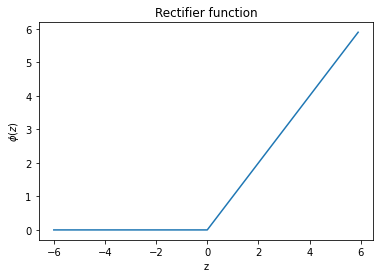

In [13]:
def rectifier(z):
    return np.maximum(0, z)

z = np.arange(-6, 6, 0.1)
phi_z = rectifier(z)
plt.plot(z, phi_z)
#plt.axvline(x=0.0, color='k', alpha=0.5)
#plt.axhline(y=0.0, color='k', alpha=0.5)
plt.title('Rectifier function')
plt.xlabel('z')
plt.ylabel(r'$\phi (z)$')
plt.show()

Applying this function to the output of a linear transformation yelds a nonlinear function. However, the function remains close to be linear, in the sense that it is a **piecewise linear function**.

Regarding the choice of the activation function, some properties are desirable:
- **Nonlinear**: using a nonlinear activation function, then a two-layer neural network can be proven to be a universal function approximator ([Universal approximation theorem](https://en.wikipedia.org/wiki/Universal_approximation_theorem)). The identity activation function $f(z)=z$ doesn't satisfy this property. When multiple layers use the identity activation function, then the entire network can be reduced to a single-layer model.
- **Continuously differentiable**: in order to enable gradient-based optimization methods. For example the binary step function (used by the Perceptron) is not differentiable at 0, so gradient methods can make no progress with it. The ReLU is also non-differentiable at 0, anyway it is differentiable anywhere else and the value of the derivative at zero can be arbitrarily chosen to be 0 or 1.
- **Monotonic**: when the activation function is monotonic, the error surface associated with a single-layer model is guaranteed to be convex.
- **Smooth functions with a monotonic derivative**: these have been shown to generalize better in some cases.
- **Approximates identity near the origin**: when activation functions have this property, the neural network will learn efficiently when its weights are initialized with small random values. When the activation function does not approximate identity near the origin, special care must be used when initializing the weights.

When building a neural network, avoid using the sigmoid activation function, except for the output layer if we are doing binary classification, since the hyperbolic tangent $\phi(z) = tanh(z)$ is strictly superior to it. The standard activation function which is typically used is the ReLU or, in some cases, the leaky ReLU.

# Multi-layer networks
The term *network* comes to the fact that multiple functions are composed together in a model resulting into a directed acyclic graph. For example we may have 3 functions $f^{(1)}, f^{(2)}, f^{(3)}$ composed together in a chain to form $f(\mathbf{x}) = f^{(3)}\left( f^{(2)} \left( f^{(1)}(\mathbf{x})\right)\right)$. The i-th function is called the i-th **layer** and the length of the chain gives the **depth** of the model. The final layer is the **output layer**. The training data provides us noisy examples of $f^*(\mathbf{x})$ evaluated at different points. Those training examples specify what the output layer should produce for each input $\mathbf{x}$, anyway, they don't specify what the behavior of the intermediate layers should be. It is the task of the learning algorithm to regulate their behaviour. Because the training data doesn't show the desired output of each of these layers, they are called **hidden layers**. A layer can be thought either as a vector-to-vector function or as many units acting in parallel, each representing a vector-to-scalar function (a single neuron).

Linear models, such as linear regression or logistic regression can be fit efficiently, either in closed form or with convex optimization. Anyway, they have the defect to limit the model capacity to linear functions. In order to extend its capacity to nonlinear functions of $\mathbf{x}$, instead of applying the linear model to $\mathbf{x}$, we can apply it to a transformed input $\phi(\mathbf{x})$ where $\phi$ is a nonlinear function defining a hidden layer and providing a new representation of $\mathbf{x}$. In feedforward neural nets we have a model $y=f(x;\theta, w) = \phi(x;\theta)^\top w$ where the parameters $\theta$ are used to learn $\phi$ from a broad class of functions (that class has to be chosen and this is not trivial at all).

Similarly to linear models, the optimizer, the cost function and the form of the output units still still have to be chosen. Furthermore, since feedforward networks introduced the concept of hidden layers, we must also choose the activation functions that will be used to compute the weights of the hidden layers.

## Learning a XOR function
The truth table of the XOR function is:

| x1 | x2 | XOR |
|:--:|:--:|:---:|
|  0 |  0 |  0  |
|  0 |  1 |  1  |
|  1 |  0 |  1  |
|  1 |  1 |  0  |

We can treat this problem as a regression problem using the MSE as the loss function (in general, we should not use MSE as a cost function for modelling binary data, but prefer the logit function as we've seen in the chapter on logistic regression).

$$J(\theta) = \sum_{x\in \mathbb{X}}{\left(f^*(x) - f(x;\theta) \right)^2}$$

If we choose $f(x;\theta)$ to be a linear model $f(x;\theta) = \mathbf{w}^\top x + b$ with $\mathbf{w}\in \mathbb{R}^2$ and $b \in \mathbb{R}$, and solve the normal equations, we would end up with $\mathbf{w} = \mathbf{0}$ and $b=\frac{1}{2}$, that is a model that always predict $y = \frac{1}{2}$. We have to use a nonlinear model that is able to learn a different feature space in which a linear model can represent the solution.

Let's then introduce an intermediate layer containing two units resulting in a vector of hidden units $h$ that are computed by $h = f^{(1)}\left(x; W,c\right)$. The output layer will be a linear regression model $y = f^{(2)}\left(h; w, b\right) = w^\top h + b$, but acting on $h$ instead of $x$, a representation of the input in a new feature space. The entire network is represented by $f\left(\mathbf{x}; \mathbf{W},\mathbf{c},\mathbf{w},b\right) = f^{(2)}\left(f^{(1)}(\mathbf{x})\right)$ where $f^{(1)}$ has to be nonlinear, otherwise the network would result in a linear function of the input $x$, being unable to learn a XOR function.

As we've seen before, a ReLU unit might come to our aid by combining the input in an affine trasformation (obtaining the net input) that will then be fed to a nonlinear function (the rectifier). Let then $h$ be $h=g\left(W^\top x + c\right)$ where $W$ is a matrix containing the weights of the linear trasformation and $c$ the biases (which is a vector, because the affine transformation is from a vector $x$ to a vector $h$. The activation function is typically appliable element-wise, with $h_i = g\left(x^\top W_{:,i} + c_i \right)$, we'll use the rectifier activation function $g(z)=\max\left\{0,z\right\}$. The full network is then:

$$f\left(\mathbf{x}; \mathbf{W},\mathbf{c},\mathbf{w},b\right) = \mathbf{w}^\top \max\left\{0,\mathbf{W}^\top \mathbf{x} + \mathbf{c}\right\} + b $$

and it has the following structure:

<img src='images/neural_networks/XOR_net.png' style="width:15em"/>

Now we can manually specify the solution to the XOR problem letting:

$$W = \begin{bmatrix}1 & 1 \\ 1 & 1 \end{bmatrix} \qquad c = \begin{bmatrix}0\\ -1 \end{bmatrix} \qquad  w=\begin{bmatrix}1\\ -2 \end{bmatrix} \qquad b=0$$

In [122]:
# inputs and parameters
X = np.matrix([(0,0),(0,1),(1,0),(1,1)])
W = np.ones((2,2))
c = np.array([0,-1])
w = np.array([1,-2])
b = 0

# computations of the network
net_input = X @ W + c
h = rectifier(net_input)
y = h.dot(w).T + b

# visualize outputs
for x, combination, activation, output in zip (X,net_input, h, y):
    print('x={}, net_input={}, h={}, y={}'.format(x, combination, activation, output.item()))

x=[[0 0]], net_input=[[ 0. -1.]], h=[[0. 0.]], y=0.0
x=[[0 1]], net_input=[[1. 0.]], h=[[1. 0.]], y=1.0
x=[[1 0]], net_input=[[1. 0.]], h=[[1. 0.]], y=1.0
x=[[1 1]], net_input=[[2. 1.]], h=[[2. 1.]], y=0.0


In real problems, instead of manually choosing parameters values, they are found by a gradient-based optimization algorithm.

In the following plots we can see how the inputs are mapped from the original feature space, in which they weren't linearly separable, to a new feature space by the hidden layer computation, where they can be perfectly separated by a suitable linear model.

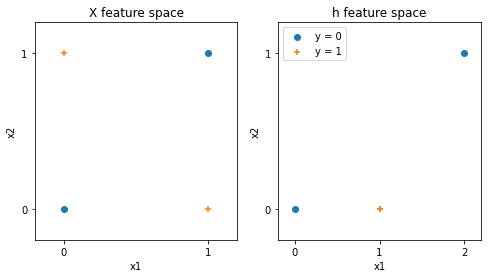

In [183]:
#@Visualize feature spaces
X1 = np.array(X[:,0])
X2 = np.array(X[:,1])
h1 = np.array(h[:,0])
h2 = np.array(h[:,1])
y = np.array(y)
markers = ('o', '+')

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8,4))

for idx, cl in enumerate(np.unique(y)):
    ax1.scatter(X1[y == cl], X2[y == cl], marker = markers[idx], label='y = {}'.format(int(cl)))
    ax2.scatter(h1[y == cl], h2[y == cl], marker = markers[idx], label='y = {}'.format(int(cl)))

margin = 0.2
ax1.set_title('X feature space')
ax1.set_xlabel('x1')
ax1.set_ylabel('x2')
ax1.set_xticks([0,1])
ax1.set_yticks([0,1])
ax1.set_xlim([0-margin, 1+margin])
ax1.set_ylim([0-margin, 1+margin])

ax2.set_title('h feature space')
ax2.set_xlabel('x1')
ax2.set_ylabel('x2')
ax2.set_xticks([0,1,2])
ax2.set_yticks([0,1])
ax2.set_xlim([0-margin, 2+margin])
ax2.set_ylim([0-margin, 1+margin])
ax2.legend(loc='upper left')

plt.show()

## Visual interpretation
The goal of the following explanation is to provide an insight on what is the meaning of composing multiple neurons into a network, without any mathematical rigor. In order to obtain a nonlinear model we can take two sigmoid units, each of which assigns a probability to each data point, and sum those probabilities together, point by point, obtaining new values that have to be rescaled back between 0 and 1 (and that can be done with another sigmoid function). If we want to give more importance to one of the two units, we can take a linear combination of the two, instead of simply summing them together, and we also add a bias term (otherwise the resulting value would always be positive and, if fed to a sigmoid unit, would result in always being classified as positive).

<img src="images/neural_networks/visual_network.png" style="width:50em" />

which is equivalent this neural network:

<img src="images/neural_networks/visual_network_2.jpg" style="width:20em" />

## Generalization and vectorized notation
From now on, I will use the following [notation](https://cs230.stanford.edu/files/Notation.pdf):
- superscript $(i)$: i-th training example
- superscript $[l]$: l-th layer
- $m$: number of examples in the dataset
- $n_x$: number of input units
- $n_{h}^{[l]}$: number of units in the l-th hidden layer
- $n_y$: number of output units (or number of classes)
- $L$: number of layers in the network
- $x^{(i)}\in \mathbb{R}^{n_x}$ is the i-th training example represented as a column vector
- $X\in \mathbb{R}^{n_x \times m}$: input matrix (the i-th column correspond to the i-th training example)
- $Y\in \mathbb{R}^{n_y \times m}$ is the label matrix
- $y^{(i)}\in \mathbb{R}^{n_y}$ is the output label for the i-th example
- $b^{[l]}\in \mathbb{R}^{n^{[l+1]}}$: bias vector in the l-th layer
- $\hat{y}\in \mathbb{R}^{n_y}$: predicted output vector
- $x_{ji}$: input from unit $i$ into unit $j$
- $w_{ji}$: weight from unit $i$ into unit $j$
- $W^{[l]} \in \mathbb{R}^{n^{[l+1]} \times n^{[l-1]}}$: the weight matrix associated with the l-th layer
- $a_j^{[l]}$: the output of the j-th neuron of the l-th hidden layer.

### Example
Consider this network with $n_x=3$ inputs in the input layer, 1 hidden layer with $n_h^{[1]}=2$ units and an output layer with $n_y=2$ output unit:

<img src="images/neural_networks/notation.png" style="width:25em" />

where 

$$W^{[1]}= \begin{bmatrix} w_{11} & w_{12} & w_{13} \\ w_{21} & w_{22} & w_{23} \end{bmatrix}, \qquad 
W^{[2]}= \begin{bmatrix} w_{11} & w_{12} \end{bmatrix}, \qquad
a^{[1]} = \begin{bmatrix} a_{1}^{[1]} \\ a_{2}^{[1]} \end{bmatrix}, \qquad
a^{[2]} = a_1^{[2]}$$

In this representation the bias terms are omitted and they have to be considered implicitly inside each neuron. For a single input data $x^{(i)}$ the computation will proceed as follows:

$$
a^{[1](i)} = \phi\left(W^{[1]}x^{(i)} + b^{[1]} \right), \qquad
\hat{y} = a^{[2](i)} = \phi\left(W^{[2]}a^{[1](i)} + b^{[2]} \right)
$$


We can use a vectorized notation to represent $m$ input data $x^{(i)}$ inside $X$:

$$
X = \begin{bmatrix}
| & | & | \\
x^{(1)} & \dots & x^{(m)} \\
| & | & | \\
\end{bmatrix} \in \mathbb{R}^{3 \times m}
$$

The computation will proceed in this way:

$$
A^{[1]} = \phi\left(W^{[1]}X + b^{[1]} \right) \in \mathbb{R}^{2}, \qquad
\hat{y} = A^{[2]} = \phi\left(W^{[2]}A^{[1]} + b^{[2]} \right) \in \mathbb{R}
$$


# Backpropagation algorithm
The main difference between linear models and neural netoworks is that the nonlinearity of neural network causes the loss function to become non-convex. Consequently, stochastic gradient descent applied to such types of functions has not convergence guarantee and is sensitive to the initial values of the parameters. Sticking with the previous example, the cost function will be:

$$J\left(W^{[1]}, b^{[1]}, W^{[2]}, b^{[2]} \right) = \frac{1}{m} \sum_{i=1}^{m} \mathcal{L}\left(\hat{y}^{(i)} - y^{(i)}\right)$$

where, $\mathcal{L}(\cdot)$ is the loss function that, in case of a binary classification problem, can be the logistic cost function (or log-likelihood function) that we already defined in the chapter about logistic regression, and $\hat{y}^{(i)} = a^{[2]}$ is the output predicted by the network associated to the i-th input.

Proceed to minimize $J$ with the gradient descent algorithm that we already know: 

Repeat until the termination condition is met:
- compute the prediction $\hat{y}^{(i)}$ for each input ($i=1...m$)
- compute the derivatives of the cost function with respect to the parameters: $\text{d}W^{[1]}=\frac{\partial J}{\partial W^{[1]}}$, $\text{d}b^{[1]}=\frac{\partial J}{\partial b^{[1]}}$, $\text{d}W^{[2]}=\frac{\partial J}{\partial W^{[2]}}$, $\text{d}b^{[2]}=\frac{\partial J}{\partial b^{[2]}}$.
- update each parameter value according to the learning rate:  
    - $W^{[1]} \leftarrow W^{[1]} - \eta \text{d}W^{[1]}$
    - $b^{[1]} \leftarrow b^{[1]} - \eta \text{d}b^{[1]}$
    - $W^{[2]} \leftarrow W^{[2]} - \eta \text{d}W^{[2]}$
    - $b^{[2]} \leftarrow b^{[2]} - \eta \text{d}b^{[2]}$

The tricky part is how to compute these partial derivatives.